# Python for TS developers

The main presentation is in Notion

<https://www.notion.so/trawa/Python-for-TS-developers-8086ad68c0a54f219a6a2f9c0bbbd836>

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('./all_rows_should_be_15_min_apart_results.csv')
df.head()

,volume_curve_id,timestamp_start,next_timestamp,missing_entries
0,1e7a4b7f-67ca-5cfc-a43d-c28058e94664,2024-09-26 03:30:00,2024-09-26 04:00:00,1
1,1e7a4b7f-67ca-5cfc-a43d-c28058e94664,2024-09-26 01:45:00,2024-09-26 02:15:00,1
2,06741c57-d5d8-5981-a0da-099541464c6a,2024-09-26 01:15:00,2024-09-26 01:45:00,1
3,1e7a4b7f-67ca-5cfc-a43d-c28058e94664,2024-09-26 00:15:00,2024-09-26 00:45:00,1
4,1e7a4b7f-67ca-5cfc-a43d-c28058e94664,2024-09-25 01:45:00,2024-09-25 02:15:00,1


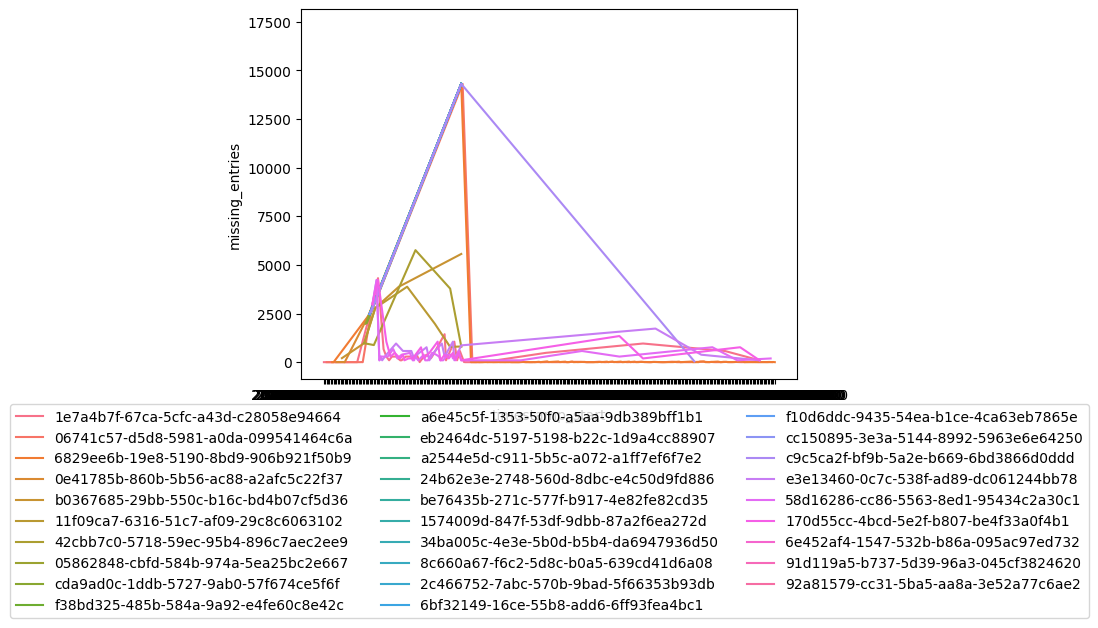

In [13]:


sns.lineplot(data=df, x='timestamp_start', y='missing_entries', hue='volume_curve_id')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=3)

plt.show()